In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pm4py
import pickle
import itertools
import seed_to_harvest as sth
import geopandas as gpd
import os

In [2]:
#Dir path
Case='Idaho'
#Case='NorthDakota'
#Case='Colorado'
sites_pth = 'Data/'+Case+'/sites/'
cdl_pth = 'Data/'+Case+'/cdl/'
season_pth = 'Data/'+Case+'/season/'

sid=158
ts=pd.read_hdf(sites_pth+f'/Site{sid:03}_NBARint.h5')
season=pd.read_hdf(season_pth+f'/Site{sid:03}_season_day.h5')
site_names = os.listdir(sites_pth)

FileNotFoundError: File Data/Idaho/sites//Site158_NBARint.h5 does not exist

C:\Users\Vito\AppData\Local\Temp\ipykernel_29836\1827980668.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ts[f'{yt}'].plot()


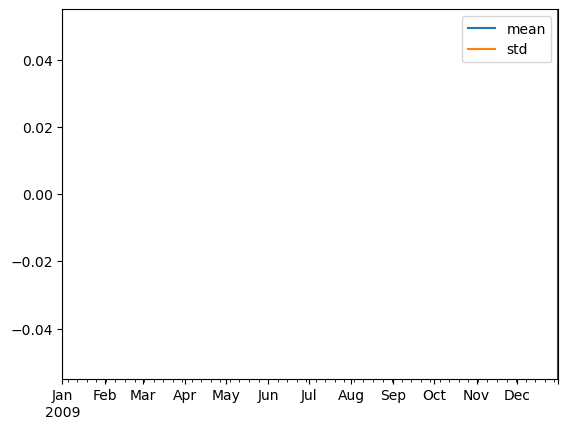

In [6]:
yt=2009
start_season = season.loc[int(yt)]['start_season']
end_season = season.loc[int(yt)]['end_season']
ts[f'{yt}'].plot()
plt.axvline(start_season, color='r')
plt.axvline(end_season, color='r')

In [7]:
site_names = os.listdir(sites_pth)
cdl_names = os.listdir(cdl_pth)
season_names = os.listdir(season_pth)
location=np.load('Data/'+Case+'/masklayers/wgscenterlist.npy')

In [ ]:
i=0
ts=pd.read_hdf(sites_pth+site_names[i])#f'/Site{sid:03}_NBARint.h5')
cdl=pd.read_hdf(cdl_pth+cdl_names[i])#f'/Site{sid:03}_cdl.h5')
season=pd.read_hdf(season_pth+season_names[i])#f'/Site{sid:03}_season_day.h5')
loc=location[i]

In [ ]:
timelog, warnings = sth.eventtime_MACD(ts, season, cdl, sid, loc, start_year=start_year)

In [2]:
Case='Colorado'
#Case='NorthDakota'
#Case='Idaho'
#timelog=pd.read_hdf('C:/Users/Vito/Documents/Seed_to_harvest_process_monitoring/Event_log/log_148sites_240129_df.h5')
timelog=pd.read_hdf('C:/Users/Vito/Documents/Seed_to_harvest_process_monitoring/Event_log/log_'+Case+'_180724_ALL_df.h5')

In [4]:
usuals=np.load('Data/'+Case+'/masklayers/usuals.npy', allow_pickle=True)[0]
usuals

{'Barley': [[73, 136], [201, 257]],
 'Dry Beans': [[140, 176], [247, 293]],
 'Potatoes': [[122, 151], [249, 290]],
 'Spring Wheat': [[87, 143], [204, 272]],
 'Sugarbeets': [[89, 130], [273, 316]]}

In [5]:
keynames=list(usuals.keys())

In [6]:
timelog[timelog['Crop'].isin(keynames)].to_hdf('C:/Users/Vito/Documents/Seed_to_harvest_process_monitoring/Event_log/log_'+Case+'_180724_ALL_df_subset.h5', key='df', mode='w') 
if __name__ == "__main__":
    dataframe = pm4py.format_dataframe(timelog[timelog['Crop'].isin(keynames)], case_id='CaseID', activity_key='Activity', timestamp_key='Timestamp')
    event_log = pm4py.convert_to_event_log(dataframe)
    pm4py.write_xes(event_log, 'C:/Users/Vito/Documents/Seed_to_harvest_process_monitoring/Event_log/log_'+Case+'_180724_ALL_subset.xes')

C:\Users\Vito\AppData\Local\Temp\ipykernel_13744\3929271774.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Activity', 'Time_uncertainty', 'CaseID', 'Crop', 'WGS84_lon_lat',
       'County', 'State', 'Country', 'NDVI_range'],
      dtype='object')]

  timelog[timelog['Crop'].isin(keynames)].to_hdf('C:/Users/Vito/Documents/Seed_to_harvest_process_monitoring/Event_log/log_'+Case+'_180724_ALL_df_subset.h5', key='df', mode='w')
C:\Users\Vito\AppData\Local\Temp\ipykernel_13744\3929271774.py:3: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dataframe = pm4py.format_dataframe(timelog[timelog['Crop'].isin(keynames)], case_id='CaseID', activity_key='Activity', timestamp_key='Timestamp')
c:\Users\Vito\miniconda3\envs\gee\Lib\site-packages\pm4py\ut

exporting log, completed traces ::   0%|          | 0/2027 [00:00<?, ?it/s]

In [90]:
def crop_usual_class(log, crop, start, end, act):
    log.loc[(log['Crop']==crop)&(log['Activity']==act)&(log['doy']>=start)&(log['doy']<=end),['Activity']]='Usual '+act
    log.loc[(log['Crop']==crop)&(log['Activity']==act)&(log['doy']<start),['Activity']]='Early '+act
    log.loc[(log['Crop']==crop)&(log['Activity']==act)&(log['doy']>end),['Activity']]='Late '+act
    return log
timelog['doy']=timelog['Timestamp'].dt.dayofyear
for crop in keynames:
    timelog=crop_usual_class(timelog, crop, usuals[crop][0][0], usuals[crop][0][1],'Emergence')
    timelog=crop_usual_class(timelog, crop, usuals[crop][1][0], usuals[crop][1][1],'Dormancy')
#timelog.drop(columns=['doy'], inplace=True)

In [93]:
timelog.loc[(timelog['Activity']=='Usual First Snow')]

,Activity,Timestamp,Time_uncertainty,CaseID,Crop,SiteID,WGS84_lon_lat,County,State,Country,NDVI_range,num_valid_est,Multiple_crop,doy
17,Usual First Snow,2010-11-25,2010-11-25 00:00:00,0000_2010,Winter Wheat,0,"[-113.05221260418197, 42.746131542842555]",Power County,Idaho,United States,"[0.23193886778739564, 0.23193886778739564]",1,0,329
23,Usual First Snow,2011-11-19,2011-11-19 00:00:00,0000_2011,Potatoes,0,"[-113.05221260418197, 42.746131542842555]",Power County,Idaho,United States,"[0.4040899319193207, 0.4040899319193207]",1,0,323
35,Usual First Snow,2013-11-22,2013-11-22 00:00:00,0000_2013,Potatoes,0,"[-113.05221260418197, 42.746131542842555]",Power County,Idaho,United States,"[0.44367486849794835, 0.44367486849794835]",1,0,326
41,Usual First Snow,2014-11-17,2014-11-17 00:00:00,0000_2014,Winter Wheat,0,"[-113.05221260418197, 42.746131542842555]",Power County,Idaho,United States,"[0.39381907390247445, 0.39381907390247445]",1,0,321
47,Usual First Snow,2015-11-28,2015-11-28 00:00:00,0000_2015,Winter Wheat,0,"[-113.05221260418197, 42.746131542842555]",Power County,Idaho,United States,"[0.3714477296349794, 0.3714477296349794]",1,0,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13185,Usual First Snow,2011-11-19,2011-11-19 00:00:00,0147_2011,Winter Wheat,147,"[-112.79625830859523, 42.99857351545601]",Bingham County,Idaho,United States,"[0.3818323770697604, 0.3818323770697604]",1,0,323
13203,Usual First Snow,2014-11-15,2014-11-15 00:00:00,0147_2014,Sugarbeets,147,"[-112.79625830859523, 42.99857351545601]",Bingham County,Idaho,United States,"[0.27203997946139047, 0.27203997946139047]",1,0,319
13209,Usual First Snow,2015-11-28,2015-11-28 00:00:00,0147_2015,Spring Wheat,147,"[-112.79625830859523, 42.99857351545601]",Bingham County,Idaho,United States,"[0.321892762491567, 0.321892762491567]",1,0,332
13239,Usual First Snow,2020-11-14,2020-11-14 00:00:00,0147_2020,Winter Wheat,147,"[-112.79625830859523, 42.99857351545601]",Bingham County,Idaho,United States,"[0.1915224185359123, 0.1915224185359123]",1,0,319


In [50]:
df = pd.read_csv('C:/Users/Vito/Documents/Seed_to_harvest_process_monitoring/Source/Data/Idaho/masklayers/weather.csv')
df['year']=pd.to_datetime(df['DATE']).dt.year
df['doy']=pd.to_datetime(df['DATE']).dt.dayofyear
#df=df[df['year']>=2000]

In [88]:
np.unique(df['year'], return_counts=True)

(array([1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
        1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1998,
        1999, 2000, 2001, 2002], dtype=int64),
 array([366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366,
        365, 365, 365, 366, 365, 346, 313, 299, 207, 306, 307, 365, 303],
       dtype=int64))

In [68]:
var='SNWD'
np.unique(df[(df[var]!=0)&(~df[var].isna())][var],return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 17., 18., 19., 20., 21., 22., 24., 25., 26., 27., 30.,
        36., 38., 40.]),
 array([ 5, 11, 16, 12,  1,  8,  7, 12,  2,  9,  1,  9,  1,  6,  4,  1,  2,
         1,  3,  1,  1,  5,  2,  1,  5,  3,  1,  1,  1], dtype=int64))

In [64]:
first_lst=[]
last_lst=[]
for yt in np.unique(df['year']):
    snowdays=np.unique(df[(df['SNOW']!=0)&(~df['SNOW'].isna())&(df['year']==yt)]['doy'])
    if len(snowdays)>0:
        try:
            first_lst.append(np.min(snowdays[snowdays>180]))
        except:
            print('no snow days after 180 for year', yt)
        try:
            last_lst.append(np.max(snowdays[snowdays<180]))
        except:
            print('no snow days before 180 for year', yt)

no snow days after 180 for year 1979
no snow days after 180 for year 1989
no snow days after 180 for year 1995
no snow days before 180 for year 1996
no snow days before 180 for year 1998
no snow days after 180 for year 2002


{'whiskers': [<matplotlib.lines.Line2D at 0x23fdf379d90>,
 'caps': [<matplotlib.lines.Line2D at 0x23fdf37bc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x23fdf378890>,
 'medians': [<matplotlib.lines.Line2D at 0x23fdd39c850>,
 'fliers': [<matplotlib.lines.Line2D at 0x23fdf379c90>,
 'means': []}

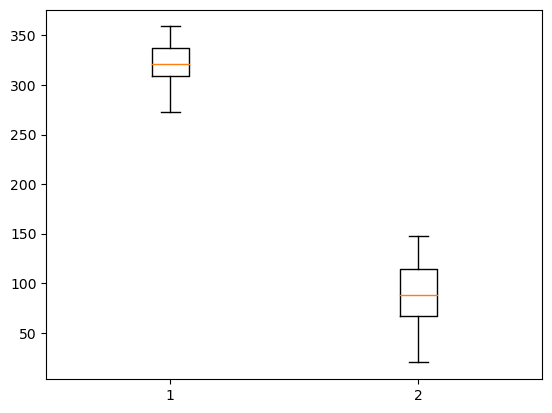

In [65]:
plt.boxplot([first_lst, last_lst])

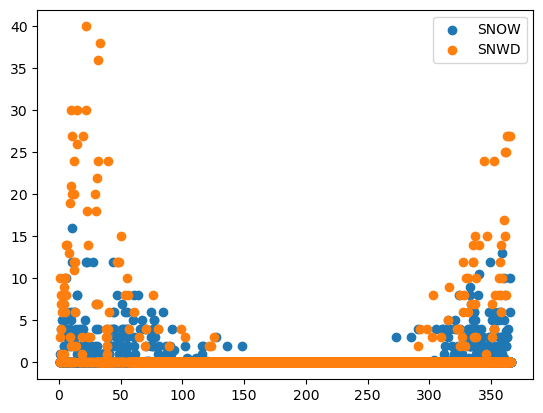

In [73]:
#df=df[df['year']<2002]
plt.scatter(df['doy'],df['SNOW'],label='SNOW')
plt.scatter(df['doy'],df['SNWD'],label='SNWD')  
plt.legend()

<Axes: >

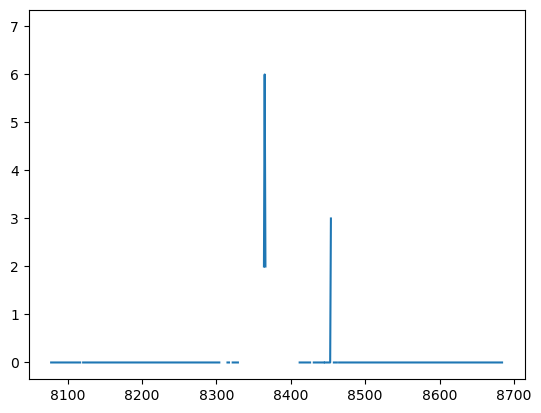

In [29]:
df['SNWD'].unique()
df['SNWD'].plot()

In [213]:
subset = timelog[timelog['SiteID'].isin([113, 158])]
subset

,Activity,Timestamp,Time_uncertainty,CaseID,Crop,SiteID,WGS84_lon_lat,County,State,Country,NDVI_range,num_valid_est,Multiple_crop


In [219]:
site_names = os.listdir(sites_pth)
num_sites=len(site_names)
num_sites

160

In [218]:
all_cases=np.unique(timelog['CaseID'])

In [220]:
no_valid_cases=[]
for i in range(num_sites):
    for yt in np.arange(2008,2023):
        if f'{i:04}_{yt}' not in all_cases:
            no_valid_cases.append(f'{i:04}_{yt}')
len(no_valid_cases)

61

In [221]:
def warn_mark(i,n):
    return f"{i:04}_{n+2007}"
def warn_site_years(Lst):
    threshold=np.nonzero(np.array(Lst[1])<0.75)[0]
    return list(map(lambda x: warn_mark(Lst[0], x), threshold))

with open(cdl_pth+"/ConsistencyPerc", "rb") as fp:   # Unpickling
    site_consistencyL = pickle.load(fp)

CaseID_anom=list(map(warn_site_years, enumerate(site_consistencyL)))

flat_CaseID_anom = list(itertools.chain.from_iterable(CaseID_anom))
invalid_due_to_multicrop=[case in flat_CaseID_anom for case in no_valid_cases]
sum(invalid_due_to_multicrop)
no_valid_cases=[no_valid_cases[i] for i in range(len(no_valid_cases)) if not invalid_due_to_multicrop[i]]
len(no_valid_cases)

25

In [222]:
crop_id=[ 'Unidentify','Corn','Cotton','Rice','Sorghum','Soybeans','Sunflower','','','','Peanuts','Tobacco','Sweet Corn','Pop or Orn Corn','Mint','','','','','','','Barley','Durum Wheat','Spring Wheat','Winter Wheat','Other Small Grains','Dbl Crop WinWht/Soybeans','Rye','Oats','Millet','Speltz','Canola','Flaxseed','Safflower','Rape Seed','Mustard','Alfalfa','Other Hay/Non Alfalfa','Camelina','Buckwheat','','Sugarbeets','Dry Beans','Potatoes','Other Crops','Sugarcane','Sweet Potatoes','Misc Vegs & Fruits','Watermelons','Onions','Cucumbers','Chick Peas','Lentils','Peas','Tomatoes','Caneberries','Hops','Herbs','Clover/Wildflowers','Sod/Grass Seed','Switchgrass','Fallow/Idle Cropland','Pasture/Grass','Forest','Shrubland','Barren','Cherries','Peaches','Apples','Grapes','Christmas Trees','Other Tree Crops','Citrus','Pecans','Almonds','Walnuts','Pears','','','','Clouds/No Data','Developed','Water','','','','Wetlands','Nonag/Undefined','','','','Aquaculture','','','','','','','','','','','','','','','','','','','Open Water','Perennial Ice/Snow','','','','','','','','','Developed/Open Space','Developed/Low Intensity','Developed/Med Intensity','Developed/High Intensity','','','','','','','Barren','','','','','','','','','','Deciduous Forest','Evergreen Forest','Mixed Forest','','','','','','','','','Shrubland','','','','','','','','','','','','','','','','','','','','','','','','Grassland/Pasture','','','','','','','','','','','','','','Woody Wetlands','','','','','Herbaceous Wetlands','','','','','','','','','Pistachios','Triticale','Carrots','Asparagus','Garlic','Cantaloupes','Prunes','Olives','Oranges','Honeydew Melons','Broccoli','Avocados','Peppers','Pomegranates','Nectarines','Greens','Plums','Strawberries','Squash','Apricots','Vetch','Dbl Crop WinWht/Corn','Dbl Crop Oats/Corn','Lettuce','Dbl Crop Triticale/Corn','Pumpkins','Dbl Crop Lettuce/Durum Wht','Dbl Crop Lettuce/Cantaloupe','Dbl Crop Lettuce/Cotton','Dbl Crop Lettuce/Barley','Dbl Crop Durum Wht/Sorghum','Dbl Crop Barley/Sorghum','Dbl Crop WinWht/Sorghum','Dbl Crop Barley/Corn','Dbl Crop WinWht/Cotton','Dbl Crop Soybeans/Cotton','Dbl Crop Soybeans/Oats','Dbl Crop Corn/Soybeans','Blueberries','Cabbage','Cauliflower','Celery','Radishes','Turnips','Eggplants','Gourds','Cranberries','','','','Dbl Crop Barley/Soybeans']
CropID=[]
for i in no_valid_cases:
    sid=int(i[:4])
    cdl=pd.read_hdf(cdl_pth+f'/Site{sid:03}_cdl.h5')
    cid=cdl.loc[int(i[-4:])]
    CropID.append(crop_id[int(cid)])


In [223]:
df = pd.DataFrame({'no_valid_cases': no_valid_cases})

# Extract the first 4 characters into a new column
df['site'] = df['no_valid_cases'].str[:4]

# Extract the last 4 characters into a new column
df['year'] = df['no_valid_cases'].str[-4:]
df['CropID']=CropID
df.drop('no_valid_cases', axis=1, inplace=True)


C:\Users\Vito\AppData\Local\Temp\ipykernel_22188\3033299473.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(crops, rotation=45)


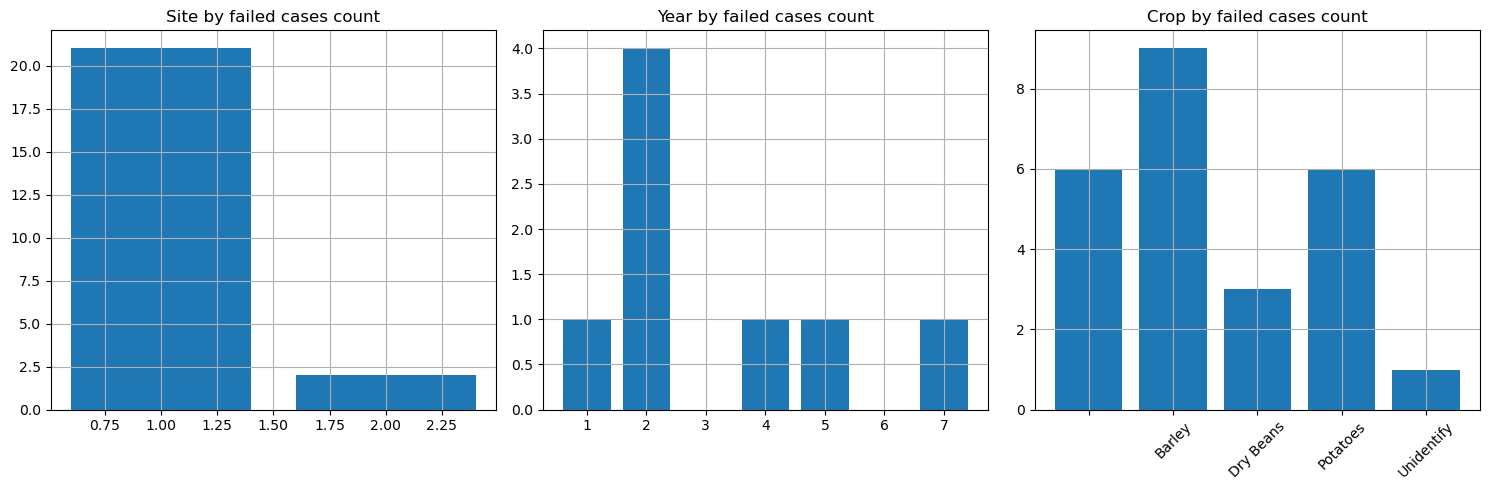

In [224]:
sites,site_failed_count=np.unique(df['site'], return_counts=True) 
years,year_failed_count=np.unique(df['year'], return_counts=True)
crops,crop_failed_count=np.unique(df['CropID'], return_counts=True) 

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].bar(np.unique(site_failed_count, return_counts=True)[0],np.unique(site_failed_count, return_counts=True)[1])
ax[0].set_title('Site by failed cases count')
ax[0].grid()


ax[1].bar(np.unique(year_failed_count, return_counts=True)[0],np.unique(year_failed_count, return_counts=True)[1])
ax[1].set_title('Year by failed cases count')
ax[1].grid()

ax[2].bar(crops,crop_failed_count)
ax[2].set_title('Crop by failed cases count')
ax[2].set_xticklabels(crops, rotation=45)
ax[2].grid()
plt.tight_layout()
plt.show()

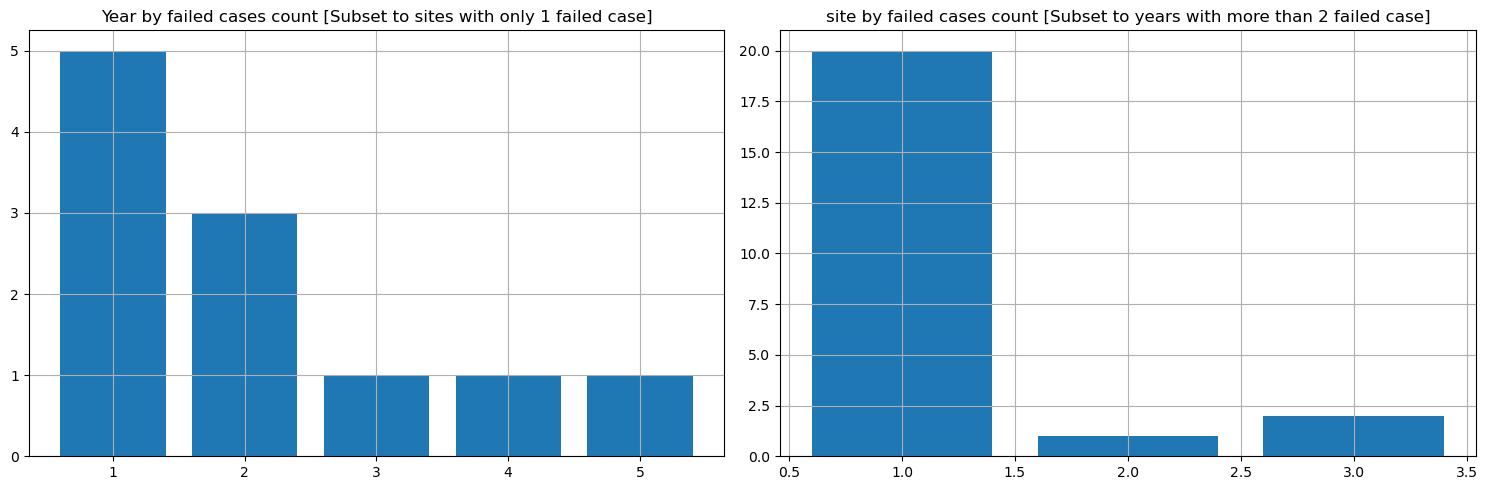

In [125]:
sites,site_failed_count=np.unique(df['site'], return_counts=True) 
years,year_failed_count=np.unique(df['year'], return_counts=True) 
subset_df = df[df['site'].isin(sites[site_failed_count==1])]
subset_df.reset_index(drop=True, inplace=True)
years,year_failed_count=np.unique(subset_df['year'], return_counts=True) 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(np.unique(year_failed_count, return_counts=True)[0],np.unique(year_failed_count, return_counts=True)[1])
ax[0].set_title('Year by failed cases count [Subset to sites with only 1 failed case]')
ax[0].grid()

sites,site_failed_count=np.unique(df['site'], return_counts=True) 
years,year_failed_count=np.unique(df['year'], return_counts=True) 
subset_df = df[df['year'].isin(years[year_failed_count>2])]
subset_df.reset_index(drop=True, inplace=True)
site,site_failed_count=np.unique(subset_df['site'], return_counts=True) 

ax[1].bar(np.unique(site_failed_count, return_counts=True)[0],np.unique(site_failed_count, return_counts=True)[1])
ax[1].set_title('site by failed cases count [Subset to years with more than 2 failed case]')
ax[1].grid()
plt.tight_layout()
plt.show()

In [ ]:
#check time series integrity?if there is a lot of missing data
#check shape?
#check relationship with crop?

In [203]:
shapefile_path = 'Data/'+Case+'/masklayers/site_mask.shp'
#= 'C:/Users/Vito/Documents/p1/masklayers/potato_flt_mask.shp'
gdf = gpd.read_file(shapefile_path)

#int_sites=[int(i) for i in np.unique(df['site'])]
#sites,site_failed_count=np.unique(df['site'], return_counts=True)

#subset_gdf = gdf.iloc[int_sites]
subset_gdf = gdf.iloc[158]
subset_gdf.reset_index(drop=True, inplace=True)
subset_gdf['count']=site_failed_count

C:\Users\Vito\AppData\Local\Temp\ipykernel_22188\2364619463.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_gdf['count']=site_failed_count
C:\Users\Vito\AppData\Local\Temp\ipykernel_22188\2364619463.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_gdf['count']=site_failed_count


In [205]:
gdf.iloc[113]

VALUE                                                     1.0
area                                              1042602.212
area2                                             1042602.212
geometry    POLYGON ((-874499.892563198 1675108.5148153626...
Name: 113, dtype: object

In [ ]:
ax=subset_gdf.plot(column=subset_gdf['count'],cmap='magma')

# Add title and labels
plt.title('Sites with failed cases')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=0, vmax=max(site_failed_count)))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)
# Show the plot
plt.show()

In [ ]:

#source usda field crops usual planting and harvesting --idaho
#https://downloads.usda.library.cornell.edu/usda-esmis/files/vm40xr56k/dv13zw65p/w9505297d/planting-10-29-2010.pdf
potato_usual=[[pd.Timestamp(2009, 4, 6).dayofyear,pd.Timestamp(2009, 6, 9).dayofyear]
              ,[pd.Timestamp(2009, 8, 15).dayofyear,pd.Timestamp(2009, 10, 27).dayofyear]]

alfalfa_usual=[[0,0]
               ,[pd.Timestamp(2009, 5, 22).dayofyear,pd.Timestamp(2009, 10, 20).dayofyear]]

sugarbeets_usual=[[pd.Timestamp(2009, 3, 24).dayofyear,pd.Timestamp(2009, 5, 5).dayofyear]
                  ,[pd.Timestamp(2009, 9, 15).dayofyear,pd.Timestamp(2009, 11, 10).dayofyear]]

springwheat_usual=[[pd.Timestamp(2009, 3, 21).dayofyear,pd.Timestamp(2009, 5, 26).dayofyear]
                   ,[pd.Timestamp(2009, 8, 4).dayofyear,pd.Timestamp(2009, 9, 29).dayofyear]]

winterwheat_usual=[[pd.Timestamp(2008, 9, 8).dayofyear,pd.Timestamp(2008, 11, 3).dayofyear]
                   ,[pd.Timestamp(2009, 7, 23).dayofyear,pd.Timestamp(2009, 9, 14).dayofyear]]

In [ ]:

timelog['Day_of_Year'] = timelog['Timestamp'].dt.dayofyear

crops = ['Potatoes', 'Spring Wheat', 'Sugarbeets']
usual = [potato_usual, springwheat_usual, sugarbeets_usual]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
ax=ax.flatten()

for i, crop in enumerate(crops):
    crop_df = timelog[timelog['Multiple_crop']==0][timelog[timelog['Multiple_crop']==0]['Crop'] == crop]
    ax[i].boxplot([crop_df[crop_df['Activity'] == activity]['Day_of_Year'] for activity in ['Emergence', 'Maturity', 'Senescence', 'Dormancy']], labels=['Emergence', 'Maturity', 'Senescence', 'Dormancy'])
    ax[i].hlines(usual[i][0], 0.5, 1.5, ls='--', lw=1.5, color='g', label='usual planting')
    ax[i].hlines(usual[i][1], 3.5, 4.5, ls='--', lw=1.5, color='r', label='usual harvesting')
    ax[i].set_title(f'{crop}',  fontsize=18)
    ax[i].tick_params(axis='x', labelsize=16)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
ax[0].set_ylabel('Day of Year', fontsize=18)
ax[1].set_xlabel('Activity',  fontsize=18)
ax[0].legend()
 

plt.suptitle('Result distribution with usual planting and harvesting dates',  fontsize=24)
plt.tight_layout()
plt.savefig('Result/boxplot_3crop.pdf', format='pdf')
plt.show()
